In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Perceptrons

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=-inf,
           validation_fraction=0.1, verbose=0, warm_start=False)

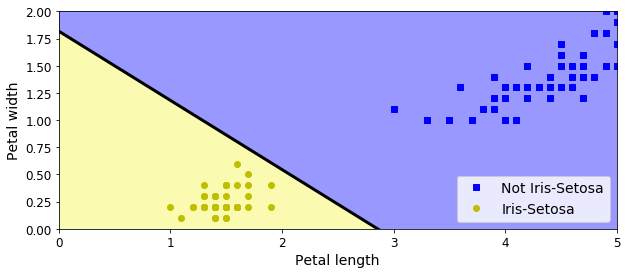

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)


plt.show()

# Activation functions

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

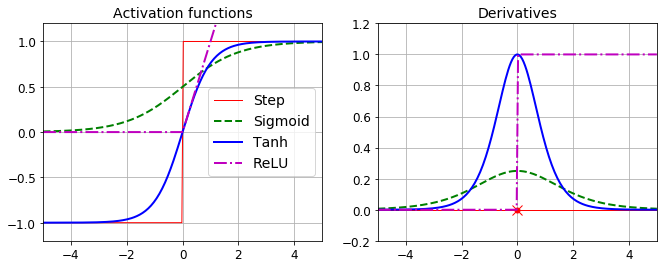

In [8]:

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])


plt.show()

# FNN for MNIST

## Using Estimator API

In [9]:

import tensorflow as tf

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11493376/11490434 [==============================] - 12s 1us/step


In [13]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28*28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10, 
                                    feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X":X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn = input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\JANMAJ~1\\AppData\\Local\\Temp\\tmpp6xhal_e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027A9AE0F978>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Va

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\JANMAJ~1\AppData\Local\Temp\tmpp6xhal_e\model.ckpt.
INFO:tensorflow:loss = 113.76112, step = 1
INFO:tensorflow:global_step/sec: 370.573
INFO:tensorflow:loss = 16.391996, step = 101 (0.254 sec)
INFO:tensorflow:global_step/sec: 556.576
INFO:tensorflow:loss = 12.365818, step = 201 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.425
INFO:tensorflow:loss = 4.723634, step = 301 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.375
INFO:tensorflow:loss = 3.6565247, step = 401 (0.180 sec)
INFO:tensorflow:global_step/sec: 587.545
INFO:tensorflow:loss = 3.0474756, step

INFO:tensorflow:global_step/sec: 505.556
INFO:tensorflow:loss = 0.78512424, step = 7401 (0.199 sec)
INFO:tensorflow:global_step/sec: 573.279
INFO:tensorflow:loss = 0.8090983, step = 7501 (0.172 sec)
INFO:tensorflow:global_step/sec: 522.966
INFO:tensorflow:loss = 1.0524948, step = 7601 (0.193 sec)
INFO:tensorflow:global_step/sec: 593.555
INFO:tensorflow:loss = 0.35734987, step = 7701 (0.166 sec)
INFO:tensorflow:global_step/sec: 323.25
INFO:tensorflow:loss = 2.0647998, step = 7801 (0.310 sec)
INFO:tensorflow:global_step/sec: 433.152
INFO:tensorflow:loss = 0.20953944, step = 7901 (0.231 sec)
INFO:tensorflow:global_step/sec: 510.496
INFO:tensorflow:loss = 0.083533034, step = 8001 (0.196 sec)
INFO:tensorflow:global_step/sec: 476.441
INFO:tensorflow:loss = 0.2832744, step = 8101 (0.210 sec)
INFO:tensorflow:global_step/sec: 549.767
INFO:tensorflow:loss = 0.93442273, step = 8201 (0.183 sec)
INFO:tensorflow:global_step/sec: 615.611
INFO:tensorflow:loss = 0.40109086, step = 8301 (0.170 sec)
INFO

INFO:tensorflow:global_step/sec: 556.87
INFO:tensorflow:loss = 0.044338726, step = 15601 (0.185 sec)
INFO:tensorflow:global_step/sec: 586.94
INFO:tensorflow:loss = 0.19101861, step = 15701 (0.165 sec)
INFO:tensorflow:global_step/sec: 589.277
INFO:tensorflow:loss = 0.42943978, step = 15801 (0.170 sec)
INFO:tensorflow:global_step/sec: 525.395
INFO:tensorflow:loss = 0.08721954, step = 15901 (0.190 sec)
INFO:tensorflow:global_step/sec: 624.829
INFO:tensorflow:loss = 0.00371397, step = 16001 (0.170 sec)
INFO:tensorflow:global_step/sec: 588.491
INFO:tensorflow:loss = 0.14643863, step = 16101 (0.170 sec)
INFO:tensorflow:global_step/sec: 544.52
INFO:tensorflow:loss = 0.46069896, step = 16201 (0.176 sec)
INFO:tensorflow:global_step/sec: 601.369
INFO:tensorflow:loss = 0.1334276, step = 16301 (0.166 sec)
INFO:tensorflow:global_step/sec: 624.458
INFO:tensorflow:loss = 0.008781488, step = 16401 (0.159 sec)
INFO:tensorflow:global_step/sec: 555.697
INFO:tensorflow:loss = 0.2521123, step = 16501 (0.19

INFO:tensorflow:global_step/sec: 393.93
INFO:tensorflow:loss = 0.03977356, step = 23701 (0.253 sec)
INFO:tensorflow:global_step/sec: 438.838
INFO:tensorflow:loss = 0.11165535, step = 23801 (0.229 sec)
INFO:tensorflow:global_step/sec: 452.758
INFO:tensorflow:loss = 0.05354642, step = 23901 (0.221 sec)
INFO:tensorflow:global_step/sec: 465.326
INFO:tensorflow:loss = 0.11091218, step = 24001 (0.214 sec)
INFO:tensorflow:global_step/sec: 509.116
INFO:tensorflow:loss = 0.016811054, step = 24101 (0.206 sec)
INFO:tensorflow:global_step/sec: 452.978
INFO:tensorflow:loss = 0.043713674, step = 24201 (0.210 sec)
INFO:tensorflow:global_step/sec: 368.049
INFO:tensorflow:loss = 0.22374149, step = 24301 (0.274 sec)
INFO:tensorflow:global_step/sec: 379.004
INFO:tensorflow:loss = 0.03281638, step = 24401 (0.264 sec)
INFO:tensorflow:global_step/sec: 400.005
INFO:tensorflow:loss = 0.041273214, step = 24501 (0.250 sec)
INFO:tensorflow:global_step/sec: 405.035
INFO:tensorflow:loss = 0.010799368, step = 24601

INFO:tensorflow:global_step/sec: 652.161
INFO:tensorflow:loss = 0.0143754715, step = 31801 (0.153 sec)
INFO:tensorflow:global_step/sec: 563.746
INFO:tensorflow:loss = 0.07366723, step = 31901 (0.177 sec)
INFO:tensorflow:global_step/sec: 648.883
INFO:tensorflow:loss = 0.021802083, step = 32001 (0.154 sec)
INFO:tensorflow:global_step/sec: 651.808
INFO:tensorflow:loss = 0.018772703, step = 32101 (0.153 sec)
INFO:tensorflow:global_step/sec: 591.874
INFO:tensorflow:loss = 0.0353172, step = 32201 (0.169 sec)
INFO:tensorflow:global_step/sec: 643.213
INFO:tensorflow:loss = 0.0075765485, step = 32301 (0.155 sec)
INFO:tensorflow:global_step/sec: 623.061
INFO:tensorflow:loss = 0.01995429, step = 32401 (0.160 sec)
INFO:tensorflow:global_step/sec: 635.327
INFO:tensorflow:loss = 0.060781207, step = 32501 (0.173 sec)
INFO:tensorflow:global_step/sec: 630.664
INFO:tensorflow:loss = 0.015499135, step = 32601 (0.143 sec)
INFO:tensorflow:global_step/sec: 592.009
INFO:tensorflow:loss = 0.006623406, step = 

INFO:tensorflow:loss = 0.011138145, step = 39801 (0.172 sec)
INFO:tensorflow:global_step/sec: 474.202
INFO:tensorflow:loss = 0.035458103, step = 39901 (0.211 sec)
INFO:tensorflow:global_step/sec: 575.047
INFO:tensorflow:loss = 0.013283033, step = 40001 (0.174 sec)
INFO:tensorflow:global_step/sec: 599.146
INFO:tensorflow:loss = 0.010506915, step = 40101 (0.166 sec)
INFO:tensorflow:global_step/sec: 558.977
INFO:tensorflow:loss = 0.016571896, step = 40201 (0.180 sec)
INFO:tensorflow:global_step/sec: 575.045
INFO:tensorflow:loss = 0.03592933, step = 40301 (0.174 sec)
INFO:tensorflow:global_step/sec: 621.473
INFO:tensorflow:loss = 0.023655199, step = 40401 (0.161 sec)
INFO:tensorflow:global_step/sec: 552.802
INFO:tensorflow:loss = 0.08608101, step = 40501 (0.180 sec)
INFO:tensorflow:global_step/sec: 606.409
INFO:tensorflow:loss = 0.003960117, step = 40601 (0.166 sec)
INFO:tensorflow:global_step/sec: 602.753
INFO:tensorflow:loss = 0.0048101465, step = 40701 (0.165 sec)
INFO:tensorflow:global

In [14]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-24T09:53:52Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\JANMAJ~1\AppData\Local\Temp\tmpp6xhal_e\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-09-24-09:53:52
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9785, average_loss = 0.10449331, global_step = 44000, loss = 13.227001
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\JANMAJ~1\AppData\Local\Temp\tmpp6xhal_e\model.ckpt-44000


In [15]:
eval_results

{'accuracy': 0.9785,
 'average_loss': 0.10449331,
 'loss': 13.227001,
 'global_step': 44000}

In [16]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\JANMAJ~1\AppData\Local\Temp\tmpp6xhal_e\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([-11.464748 ,   0.5431593,   4.2781816,  10.748949 ,  -5.1137867,
         -2.6780932, -18.456083 ,  28.63005  , -10.589292 ,   4.692884 ],
       dtype=float32),
 'probabilities': array([3.8641147e-18, 6.3389620e-13, 2.6553234e-11, 1.7152848e-08,
        2.2143101e-15, 2.5295658e-14, 3.5542751e-21, 1.0000000e+00,
        9.2737733e-18, 4.0199514e-11], dtype=float32),
 'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object)}

## Using plain Tensor Flow

In [17]:

import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [18]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [25]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2/np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X,W) + b
        if activation is not None: 
            return activation(Z)
        else:
            return Z

In [26]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", 
                          activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                          activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")
    

In [29]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                             logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [30]:
learning_rate=0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [32]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [33]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [34]:
n_epochs = 40
batch_size = 50

In [35]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [37]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_val)

0 Batch accuracy: 0.94 Validation accuracy: 0.916
1 Batch accuracy: 0.96 Validation accuracy: 0.9352
2 Batch accuracy: 0.92 Validation accuracy: 0.9456
3 Batch accuracy: 0.96 Validation accuracy: 0.9532
4 Batch accuracy: 0.94 Validation accuracy: 0.9554
5 Batch accuracy: 1.0 Validation accuracy: 0.9592
6 Batch accuracy: 0.94 Validation accuracy: 0.9618
7 Batch accuracy: 0.98 Validation accuracy: 0.9634
8 Batch accuracy: 0.94 Validation accuracy: 0.9646
9 Batch accuracy: 0.92 Validation accuracy: 0.9668
10 Batch accuracy: 0.98 Validation accuracy: 0.968
11 Batch accuracy: 0.98 Validation accuracy: 0.9666
12 Batch accuracy: 0.98 Validation accuracy: 0.9696
13 Batch accuracy: 1.0 Validation accuracy: 0.9708
14 Batch accuracy: 0.94 Validation accuracy: 0.9718
15 Batch accuracy: 1.0 Validation accuracy: 0.9728
16 Batch accuracy: 1.0 Validation accuracy: 0.973
17 Batch accuracy: 1.0 Validation accuracy: 0.9748
18 Batch accuracy: 0.98 Validation accuracy: 0.975
19 Batch accuracy: 1.0 Validati

## Using dense() instead of neuron_layer()

In [39]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [40]:

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [41]:

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

Instructions for updating:
Use keras.layers.dense instead.


In [42]:

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [43]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [44]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [45]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [46]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9028
1 Batch accuracy: 0.92 Validation accuracy: 0.9252
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.942
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9512
6 Batch accuracy: 1.0 Validation accuracy: 0.9552
7 Batch accuracy: 0.94 Validation accuracy: 0.961
8 Batch accuracy: 0.96 Validation accuracy: 0.962
9 Batch accuracy: 0.94 Validation accuracy: 0.965
10 Batch accuracy: 0.92 Validation accuracy: 0.9654
11 Batch accuracy: 0.98 Validation accuracy: 0.9668
12 Batch accuracy: 0.98 Validation accuracy: 0.9684
13 Batch accuracy: 0.98 Validation accuracy: 0.9702
14 Batch accuracy: 1.0 Validation accuracy: 0.9696
15 Batch accuracy: 0.94 Validation accuracy: 0.9716
16 Batch accuracy: 0.98 Validation accuracy: 0.9726
17 Batch accuracy: 1.0 Validation accuracy: 0.9728
18 Batch accuracy: 0.98 Validation accuracy: 0.975
19 Batch accuracy: 0.98 Validati